## MonReader - part 2

----

#### Goal:
At this part of the project we will experience with different OCR algorightms to read pages of two different books: 'The Chamber' from John Grisham and 'A onda que se ergueu no mar' from Ruy Castro written in Portuguese.


----


#### Imports and Environment

In [1]:
from pathlib import Path
import cv2
import numpy as np
from PIL import Image
import csv
import re
from tqdm import tqdm
import pandas as pd

In [2]:
BASE = Path.cwd()
DATA_DIR = BASE / "data"
BOOK_DIR = DATA_DIR / "books"
WORK_DIR = BASE / "work"

ENG_BOOK_DIR = BOOK_DIR / "The_Chamber-John_Grisham"
POR_BOOK_DIR = BOOK_DIR / "A_onda_que_se_ergueu_no_mar-Ruy_Castro"

ENG_IMG_DIR = ENG_BOOK_DIR / "images"
POR_IMG_DIR = POR_BOOK_DIR / "images"

for p in [BOOK_DIR, WORK_DIR, ENG_BOOK_DIR, POR_BOOK_DIR, ENG_IMG_DIR, POR_IMG_DIR]:
        p.mkdir(parents=True, exist_ok=True)


### Step 1 - Ingestion & Page conditioning

In [3]:
# ad-hoc library for this project step: ORC 
from ocrflow_tools import process_image_folder

In [4]:
# Run Step 1
# Execute for both languages

WORK_A = WORK_DIR / "A_ingest"
WORK_A.mkdir(parents=True, exist_ok=True)

process_image_folder("english", ENG_IMG_DIR, WORK_A)
process_image_folder("portuguese", POR_IMG_DIR, WORK_A)
print("Step1 (images-only) complete.")

[english] ingest (images): 100%|██████████| 12/12 [00:05<00:00,  2.12it/s]


Done: english. Pages: 12. Log -> e:\Devs\pyEnv-1\Apziva\MonReader\work\A_ingest\ingest_log.csv


[portuguese] ingest (images): 100%|██████████| 16/16 [00:07<00:00,  2.17it/s]

Done: portuguese. Pages: 16. Log -> e:\Devs\pyEnv-1\Apziva\MonReader\work\A_ingest\ingest_log.csv
Step1 (images-only) complete.


In [5]:
log_csv = WORK_A / "ingest_log.csv"
df = pd.read_csv(log_csv)

In [6]:
columns_to_exclude = ['page_path', 'out_dir']
df.drop(columns=columns_to_exclude).tail(28)

,language,width,height,skew_angle_deg,bbox_x,bbox_y,bbox_w,bbox_h
0,english,2048,1536,0.000000,"(0, 0, 2048, 1536)","(0, 0, 2048, 1536)","(0, 0, 2048, 1536)","(0, 0, 2048, 1536)"
1,english,2048,1536,0.000000,"(0, 0, 2048, 1536)","(0, 0, 2048, 1536)","(0, 0, 2048, 1536)","(0, 0, 2048, 1536)"
2,english,2048,1536,0.000000,"(0, 0, 2048, 1536)","(0, 0, 2048, 1536)","(0, 0, 2048, 1536)","(0, 0, 2048, 1536)"
3,english,2048,1536,0.000000,"(0, 0, 2048, 1536)","(0, 0, 2048, 1536)","(0, 0, 2048, 1536)","(0, 0, 2048, 1536)"
4,english,2048,1536,0.000000,"(0, 0, 2048, 1536)","(0, 0, 2048, 1536)","(0, 0, 2048, 1536)","(0, 0, 2048, 1536)"
5,english,2048,1536,-1.000000,"(0, 0, 2048, 1536)","(0, 0, 2048, 1536)","(0, 0, 2048, 1536)","(0, 0, 2048, 1536)"
6,english,2048,1536,0.000000,"(0, 0, 2048, 1536)","(0, 0, 2048, 1536)","(0, 0, 2048, 1536)","(0, 0, 2048, 1536)"
7,english,2048,1536,0.000000,"(0, 0, 2048, 1536)","(0, 0, 2048, 1536)","(0, 0, 2048, 1536)","(0, 0, 2048, 1536)"
8,english,2048,1536,0.999992,"(0, 0, 2048, 1536)","(0, 0, 2048, 1536)","(0, 0, 2048, 1536)","(0, 0, 2048, 1536)"
9,english,2048,1536,0.999992,"(634, 0, 1414, 1536)","(634, 0, 1414, 1536)","(634, 0, 1414, 1536)","(634, 0, 1414, 1536)"


#### Step 1 – Ingestion & Page Conditioning Summary
The ingestion stage successfully collected, standardized, and deskewed all book pages, producing well-aligned images with minimal skew (mostly within ±2°) and consistent text-region detection. The resulting dataset is geometrically clean and fully logged, establishing a solid foundation for the next step binarization, where we will isolate text from background while preserving fine details and diacritics.

----

### Step 2 - Binarization

In [16]:
from ocrflow_tools import run_binarization_from_ingest

In [17]:
# folders for binarization
WORK_B = WORK_DIR / "B_binarization"
WORK_B.mkdir(parents=True, exist_ok=True)


In [18]:
# Step 2 - Binarization
run_binarization_from_ingest(log_csv, WORK_B)

Binarization: 100%|██████████| 28/28 [00:07<00:00,  3.69it/s]

Saved binarization artifacts to: e:\Devs\pyEnv-1\Apziva\MonReader\work\B_binarization
Log -> e:\Devs\pyEnv-1\Apziva\MonReader\work\B_binarization\binarization_log.csv


In [19]:
import matplotlib.pyplot as plt

In [20]:
# Plot the image outputs from binarization
def plot_binarization_outputs(page_dir: Path, save_to: Path | None = None):
    """
    Show the 5 outputs produced by run_binarization_from_ingest for a page:
      - bw_adaptive_gaussian.png
      - bw_adaptive_mean.png
      - bw_otsu.png
      - bw_selected_mask.png   (text=white)
      - bw_selected_view.png   (text=black)
    """
    names = ["bw_adaptive_gaussian.png",
             "bw_adaptive_mean.png",
             "bw_otsu.png",
             "bw_selected_mask.png",
             "bw_selected_view.png"]

    imgs, titles = [], []
    for n in names:
        p = page_dir / n
        if p.exists():
            imgs.append(plt.imread(p))
            titles.append(n.replace("bw_", "").replace(".png",""))
        else:
            print(f"Missing: {p}")

    if not imgs:
        print("No images found in:", page_dir)
        return

    plt.figure(figsize=(5*len(imgs), 6))
    for i, (im, t) in enumerate(zip(imgs, titles), 1):
        ax = plt.subplot(1, len(imgs), i)
        ax.imshow(im, cmap="gray")
        ax.set_title(t)
        ax.axis("off")
    plt.tight_layout()

    if save_to:
        save_to = Path(save_to)
        save_to.parent.mkdir(parents=True, exist_ok=True)
        plt.savefig(save_to, dpi=150, bbox_inches="tight")
        print("Saved grid to:", save_to)
    plt.show()


Saved grid to: e:\Devs\pyEnv-1\Apziva\MonReader\work\B_binarization\comparison_pag12.png


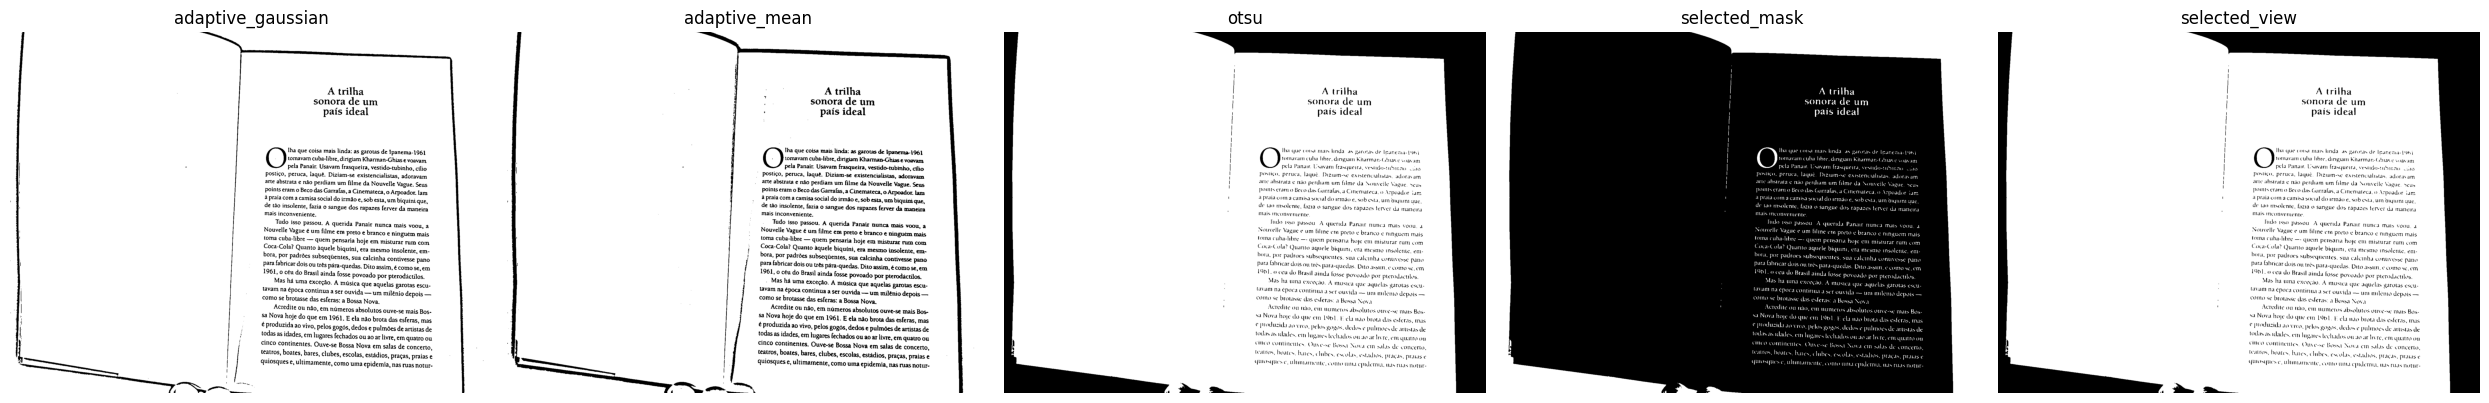

In [21]:
# pick a page folder produced by binarization:
page_dir = WORK_B / "portuguese" / "pag12"   # <- change to your page folder
plot_binarization_outputs(page_dir, save_to=WORK_B / "comparison_pag12.png")

### Binarization results (per page)

This figure shows the results of three different **thresholding methods** applied to the same page image.  
- **Adaptive Gaussian**, **Adaptive Mean**, and **Otsu** represent three common strategies for converting a grayscale page into a clean black-and-white version. Each method decides which pixels belong to text versus background based on different criteria.  
- The last two images are the system’s **selected outputs**:  
  - **Mask** → a binary image used internally, where **text pixels are white (255)** and **background is black (0)**.  
  - **View** → the same mask inverted (text black on white) for easier human inspection.  

Binarization is the foundation of OCR: it isolates ink from paper so that all later steps: line detection, character segmentation, and recognition—work on a clean, consistent signal. Comparing these variants lets us choose the one that best preserves printed characters while minimizing paper noise and shadows.



----